In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from datasets import Dataset
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Reading the csv file
dataset = pd.read_csv('table_to_train_the_model.csv')

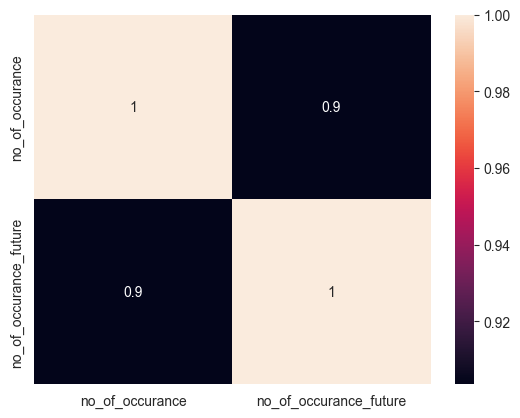

In [3]:
# Check if there is a correlation between no_of_occurrence and no_of_occurrence_future variables
dff = dataset[["RelatedLesson","no_of_occurance","no_of_occurance_future"]]
sns.heatmap(dff.corr(), annot=True)
sns.set(rc = {'figure.figsize': (40,40)})

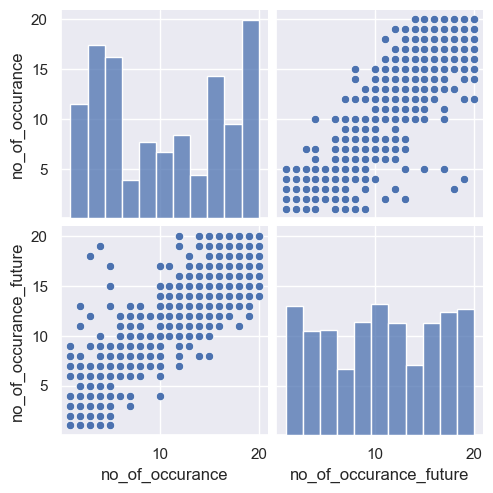

In [4]:
# Plot sns pair plot to visually represent the positive/negative correlation between the variables.
sns.pairplot(dataset[["RelatedLesson","no_of_occurance","no_of_occurance_future"]])

In [5]:
X = dataset[["RelatedLesson","no_of_occurance"]]
y = dataset[["no_of_occurance_future"]]

In [6]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791 entries, 885 to 684
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RelatedLesson    791 non-null    object
 1   no_of_occurance  791 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 18.5+ KB


In [8]:
# Exploring various lessons in the dataset
X_train["RelatedLesson"].value_counts()

data communication and networking         120
programming fundamentals                  105
data representation                        90
computer operating system                  79
database management                        78
introduction to computer                   74
fundamental of digital circuits            57
web development                            56
system analysis and design                 46
concept of it                              35
new trends and future directions of it     20
it in business                             18
internet of things                         13
Name: RelatedLesson, dtype: int64

Text(0, 0.5, 'Count of questions')

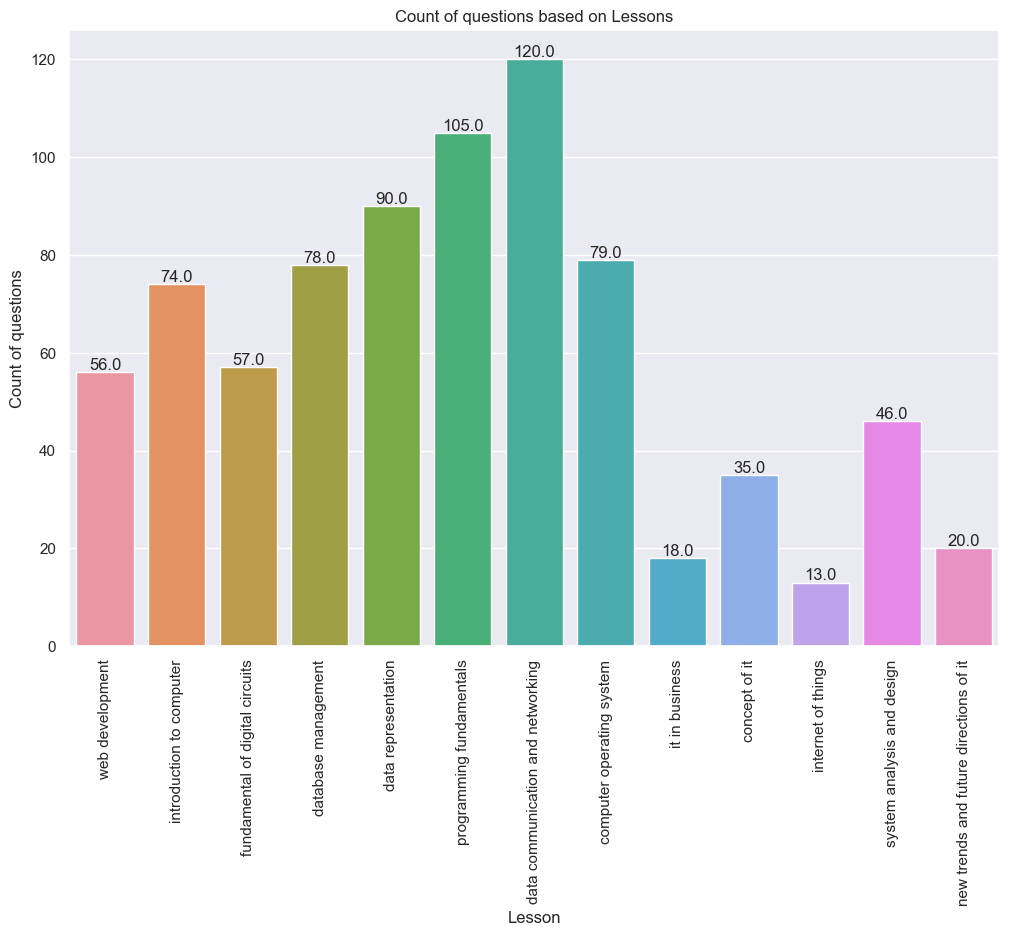

In [9]:
# Confirming that there are no null values and identify all the unique values
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'RelatedLesson', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of questions based on Lessons")
plt.xlabel("Lesson")
plt.ylabel("Count of questions")

In [10]:
# Creating dummy columns for the categorical columns
X_train = pd.get_dummies(X_train,
                         columns = ["RelatedLesson"],
                         drop_first = True)

X_test = pd.get_dummies(X_test,
                         columns = ["RelatedLesson"],
                         drop_first = True)

In [11]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

In [14]:
# Creating a linear regression model
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
# R2 score and Mean Square Error(MSE)
score = r2_score(y_test, y_pred)
error = mean_squared_error(y_test,y_pred)
print("The accuracy of the model is {}%".format(round(score,2) * 100))
print("The Mean Absolute Error of our model is {}".format(round(error, 2)))

The accuracy of the model is 76.0%
The Mean Absolute Error of our model is 7.64


In [15]:
# Creating a function to use the model
def useModel(lessonName, noOfQuestionsAnsweredIncorrectly):
    # Reading the csv file for prediction
    df1 = pd.read_csv('table_to_use_in_the_model_for_prediction.csv')
    df1.loc[len(df1.index)] = [lessonName,noOfQuestionsAnsweredIncorrectly]
    indexNum = len(df1.index)-1
    # Creating dummy columns for the categorical columns
    df1 = pd.get_dummies(df1,
                         columns = ["RelatedLesson"],
                         drop_first = True)

    global standardScaler
    df1 = standardScaler.transform(df1)

    global linearRegression
    return np.round(linearRegression.predict(df1)[indexNum])


In [16]:
useModel("internet of things", 15)

array([14.])